# Import essential libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Import dataset

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\EVIndia.csv")

In [3]:
data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


### General overview

In [4]:
print("No. of unique Values in each column")
for col in data.columns:
    print(col ,":", data[col].nunique())
    print()

No. of unique Values in each column
Car : 12

Style : 7

Range : 12

Transmission : 1

VehicleType : 1

PriceRange : 12

Capacity : 2

BootSpace : 8

BaseModel : 9

TopModel : 7



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     12 non-null     object
 8   BaseModel     12 non-null     object
 9   TopModel      12 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [6]:
data.describe()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
count,12,12,12,12,12,12,12,12,12,12
unique,12,7,12,1,1,12,2,8,9,7
top,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,na,na,na
freq,1,6,1,12,12,1,11,4,4,6


In [7]:
data.isna().sum()

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64

# Feature Engineering and Feature Extraction

#### Since many values in 'base model' and 'top model' are 'na' and it is only necessary to know which car is popular, we will drop base model and top model column. On the other hand, we can use linear regression to estimate the value of bootspace based on price range of the model. 

In [8]:
data=data.drop(['BaseModel','TopModel'], axis=1)

In [9]:
data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na


### Price Range Transformation

In [10]:
data['PriceRange']=data['PriceRange'].str.replace('₹', '')

In [11]:
data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,13.99 - 17.4 L,5 Seater,350 L
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,12.49 - 13.64 L,5 Seater,316 L
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,17.74 - 19.24 L,5 Seater,350 L
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,21.99 - 25.88 L,5 Seater,448 L
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,23.79 - 23.98 L,5 Seater,na
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,1.06 - 1.12 Cr,5 Seater,656 L
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,1.8 Cr,5 Seater,405 L
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,29.15 L,5 Seater,580 L
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,1 Cr,5 Seater,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,1.16 Cr,5 Seater,na


In [12]:
data[['Price_Min', 'Price_Max']] = data['PriceRange'].str.split('-', expand=True)
    


In [13]:
data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,Price_Min,Price_Max
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,13.99 - 17.4 L,5 Seater,350 L,13.99,17.4 L
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,12.49 - 13.64 L,5 Seater,316 L,12.49,13.64 L
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,17.74 - 19.24 L,5 Seater,350 L,17.74,19.24 L
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,21.99 - 25.88 L,5 Seater,448 L,21.99,25.88 L
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,23.79 - 23.98 L,5 Seater,na,23.79,23.98 L
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,1.06 - 1.12 Cr,5 Seater,656 L,1.06,1.12 Cr
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,1.8 Cr,5 Seater,405 L,1.8 Cr,None
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,29.15 L,5 Seater,580 L,29.15 L,None
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,1 Cr,5 Seater,na,1 Cr,None
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,1.16 Cr,5 Seater,na,1.16 Cr,None


In [14]:
def feature_extraction(price_max, price_min):
    if price_max:
        if 'Cr' in price_max:
            price_max = float(price_max.replace('Cr', '')) * 10**7
        elif 'L' in price_max:
            price_max = float(price_max.replace('L', '')) * 10**5
    
    if price_max==None and price_min:
        if 'Cr' in price_min:
            price_max = float(price_min.replace('Cr', '')) * 10**7
        elif 'L' in price_min:
            price_max = float(price_min.replace('L', '')) * 10**5
    
    return price_max

In [15]:
data['Price_Max'] = data.apply(lambda row: feature_extraction(row['Price_Max'], row['Price_Min']), axis=1)


In [16]:
data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,Price_Min,Price_Max
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,13.99 - 17.4 L,5 Seater,350 L,13.99,1740000.0
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,12.49 - 13.64 L,5 Seater,316 L,12.49,1364000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,17.74 - 19.24 L,5 Seater,350 L,17.74,1924000.0
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,21.99 - 25.88 L,5 Seater,448 L,21.99,2588000.0
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,23.79 - 23.98 L,5 Seater,na,23.79,2398000.0
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,1.06 - 1.12 Cr,5 Seater,656 L,1.06,11200000.0
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,1.8 Cr,5 Seater,405 L,1.8 Cr,18000000.0
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,29.15 L,5 Seater,580 L,29.15 L,2915000.0
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,1 Cr,5 Seater,na,1 Cr,10000000.0
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,1.16 Cr,5 Seater,na,1.16 Cr,11600000.0


In [17]:
data=data.drop(['PriceRange','Price_Min'], axis=1)

In [18]:
data

,Car,Style,Range,Transmission,VehicleType,Capacity,BootSpace,Price_Max
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,5 Seater,350 L,1740000.0
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,5 Seater,316 L,1364000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,5 Seater,350 L,1924000.0
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,5 Seater,448 L,2588000.0
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,5 Seater,na,2398000.0
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,5 Seater,656 L,11200000.0
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,5 Seater,405 L,18000000.0
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,5 Seater,580 L,2915000.0
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,5 Seater,na,10000000.0
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,5 Seater,na,11600000.0


### BootSpace Transformation

In [19]:
data=data.rename(columns={'BootSpace':'BootSpace in Litre'})

In [20]:
data=data.sort_values(by=['Price_Max'], ascending=True)

In [21]:
data

,Car,Style,Range,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,5 Seater,316 L,1364000.0
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,5 Seater,350 L,1740000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,5 Seater,350 L,1924000.0
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,5 Seater,na,2398000.0
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,5 Seater,448 L,2588000.0
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,5 Seater,580 L,2915000.0
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,5 Seater,na,10000000.0
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,5 Seater,656 L,11200000.0
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,5 Seater,na,11600000.0
11,Audi E-Tron,Compact SUV,400 Km/Full Charge,Automatic,Electric,5 Seater,660 L,11900000.0


In [22]:
data['BootSpace in Litre']=data['BootSpace in Litre'].str.replace('L','')

In [23]:
data

,Car,Style,Range,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,5 Seater,316,1364000.0
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,5 Seater,350,1740000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,5 Seater,350,1924000.0
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,5 Seater,na,2398000.0
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,5 Seater,448,2588000.0
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,5 Seater,580,2915000.0
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,5 Seater,na,10000000.0
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,5 Seater,656,11200000.0
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,5 Seater,na,11600000.0
11,Audi E-Tron,Compact SUV,400 Km/Full Charge,Automatic,Electric,5 Seater,660,11900000.0


In [24]:
data=data.reset_index(drop=True)

In [25]:
data

,Car,Style,Range,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
0,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,5 Seater,316,1364000.0
1,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,5 Seater,350,1740000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,5 Seater,350,1924000.0
3,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,5 Seater,na,2398000.0
4,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,5 Seater,448,2588000.0
5,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,5 Seater,580,2915000.0
6,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,5 Seater,na,10000000.0
7,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,5 Seater,656,11200000.0
8,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,5 Seater,na,11600000.0
9,Audi E-Tron,Compact SUV,400 Km/Full Charge,Automatic,Electric,5 Seater,660,11900000.0


In [26]:
data['BootSpace in Litre'].unique()

array(['316 ', '350 ', 'na', '448 ', '580 ', '656 ', '660 ', '405 '],
      dtype=object)

In [27]:
data['BootSpace in Litre']=data['BootSpace in Litre'].str.replace('na','0')

In [28]:
data

,Car,Style,Range,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
0,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,5 Seater,316,1364000.0
1,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,5 Seater,350,1740000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,5 Seater,350,1924000.0
3,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,5 Seater,0,2398000.0
4,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,5 Seater,448,2588000.0
5,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,5 Seater,580,2915000.0
6,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,5 Seater,0,10000000.0
7,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,5 Seater,656,11200000.0
8,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,5 Seater,0,11600000.0
9,Audi E-Tron,Compact SUV,400 Km/Full Charge,Automatic,Electric,5 Seater,660,11900000.0


In [29]:
data['BootSpace in Litre']=pd.to_numeric(data['BootSpace in Litre'])

## Predicting bootspace value based on price

In [30]:
linear_model_columns=data[['BootSpace in Litre','Price_Max']]
linearmodel=LinearRegression()

In [31]:
linear_model_columns=linear_model_columns.sort_values(by=['BootSpace in Litre'], ascending=False)

In [32]:
linear_model_columns.reset_index(drop=True)

,BootSpace in Litre,Price_Max
0,660,11900000.0
1,656,11200000.0
2,580,2915000.0
3,448,2588000.0
4,405,18000000.0
5,350,1740000.0
6,350,1924000.0
7,316,1364000.0
8,0,2398000.0
9,0,10000000.0


In [33]:
X=linear_model_columns[['Price_Max']]
y=linear_model_columns['BootSpace in Litre']

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, shuffle=False)

In [35]:
lr=LinearRegression()
res=lr.fit(X_train, y_train)

In [36]:
y_pred = lr.predict(X_test)

In [37]:
y_pred

array([430.93383297, 505.32770649, 520.98545414, 554.2581679 ])

In [38]:
linear_model_columns['BootSpace in Litre'].iloc[-4:] = y_pred
    

C:\Users\Dell\AppData\Local\Temp\ipykernel_31396\3957953398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_model_columns['BootSpace in Litre'].iloc[-4:] = y_pred


In [39]:
linear_model_columns

,BootSpace in Litre,Price_Max
9,660.000000,11900000.0
7,656.000000,11200000.0
5,580.000000,2915000.0
4,448.000000,2588000.0
11,405.000000,18000000.0
1,350.000000,1740000.0
2,350.000000,1924000.0
0,316.000000,1364000.0
3,430.933833,2398000.0
6,505.327706,10000000.0


In [40]:
data=data.sort_values(by=['BootSpace in Litre'], ascending=False)

In [41]:
data=data.drop(columns=['BootSpace in Litre', 'Price_Max'])

In [42]:
data[linear_model_columns.columns] = linear_model_columns

In [43]:
data

,Car,Style,Range,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
9,Audi E-Tron,Compact SUV,400 Km/Full Charge,Automatic,Electric,5 Seater,660.000000,11900000.0
7,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,5 Seater,656.000000,11200000.0
5,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,5 Seater,580.000000,2915000.0
4,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,5 Seater,448.000000,2588000.0
11,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,5 Seater,405.000000,18000000.0
1,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,5 Seater,350.000000,1740000.0
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,5 Seater,350.000000,1924000.0
0,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,5 Seater,316.000000,1364000.0
3,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,5 Seater,430.933833,2398000.0
6,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,5 Seater,505.327706,10000000.0


### Filling missing value in Range

In [44]:
data=data.rename(columns={'Range':'Range in Km/Full Charge'})

In [45]:
data['Range in Km/Full Charge']=data['Range in Km/Full Charge'].str.replace('Km/Full Charge', '')

In [48]:
data['Range in Km/Full Charge']=data['Range in Km/Full Charge'].str.replace('na', '0')

In [49]:
data['Range in Km/Full Charge']=pd.to_numeric(data['Range in Km/Full Charge'])

In [50]:
data

,Car,Style,Range in Km/Full Charge,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
9,Audi E-Tron,Compact SUV,400,Automatic,Electric,5 Seater,660.000000,11900000.0
7,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,5 Seater,656.000000,11200000.0
5,BYD E6,Subcompact MPV,415,Automatic,Electric,5 Seater,580.000000,2915000.0
4,MG ZS EV,Compact SUV,419,Automatic,Electric,5 Seater,448.000000,2588000.0
11,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,5 Seater,405.000000,18000000.0
1,Tata Nexon EV,Compact SUV,312,Automatic,Electric,5 Seater,350.000000,1740000.0
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,5 Seater,350.000000,1924000.0
0,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,5 Seater,316.000000,1364000.0
3,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,5 Seater,430.933833,2398000.0
6,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,5 Seater,505.327706,10000000.0


 Now that it is a numerical column we can plot the relationship of Range with Price_Max

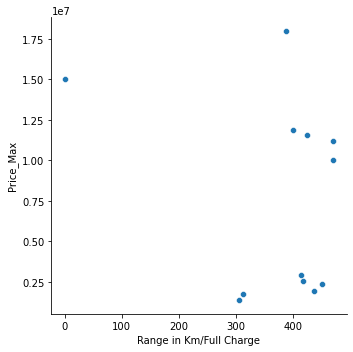

In [52]:
sns.relplot(data=data, x="Range in Km/Full Charge", y="Price_Max")

In [51]:
data['Range in Km/Full Charge']=data['Range in Km/Full Charge'].replace(0, int(data['Range in Km/Full Charge'].mean()))

In [54]:
data

,Car,Style,Range in Km/Full Charge,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
9,Audi E-Tron,Compact SUV,400,Automatic,Electric,5 Seater,660.000000,11900000.0
7,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,5 Seater,656.000000,11200000.0
5,BYD E6,Subcompact MPV,415,Automatic,Electric,5 Seater,580.000000,2915000.0
4,MG ZS EV,Compact SUV,419,Automatic,Electric,5 Seater,448.000000,2588000.0
11,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,5 Seater,405.000000,18000000.0
1,Tata Nexon EV,Compact SUV,312,Automatic,Electric,5 Seater,350.000000,1740000.0
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,5 Seater,350.000000,1924000.0
0,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,5 Seater,316.000000,1364000.0
3,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,5 Seater,430.933833,2398000.0
6,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,5 Seater,505.327706,10000000.0


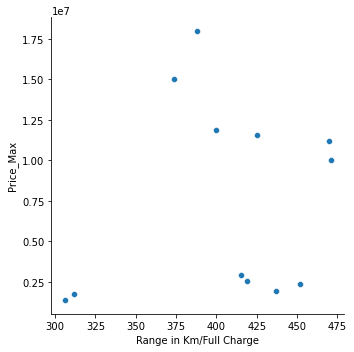

In [53]:
sns.relplot(data=data, x="Range in Km/Full Charge", y="Price_Max")

### We see that there is no direct proportionality between price of car and range so the missing value is completely random and we could also drop the row. 

#### We can also choose to drop the Style column.

In [55]:
data=data.drop('Style', axis=1)

In [56]:
data

,Car,Range in Km/Full Charge,Transmission,VehicleType,Capacity,BootSpace in Litre,Price_Max
9,Audi E-Tron,400,Automatic,Electric,5 Seater,660.000000,11900000.0
7,Jaguar I-Pace,470,Automatic,Electric,5 Seater,656.000000,11200000.0
5,BYD E6,415,Automatic,Electric,5 Seater,580.000000,2915000.0
4,MG ZS EV,419,Automatic,Electric,5 Seater,448.000000,2588000.0
11,Audi E-Tron GT,388,Automatic,Electric,5 Seater,405.000000,18000000.0
1,Tata Nexon EV,312,Automatic,Electric,5 Seater,350.000000,1740000.0
2,Tata Nexon EV Max,437,Automatic,Electric,5 Seater,350.000000,1924000.0
0,Tata Tigor EV,306,Automatic,Electric,5 Seater,316.000000,1364000.0
3,Hyundai Kona Electric,452,Automatic,Electric,5 Seater,430.933833,2398000.0
6,Mercedes-Benz EQC,471,Automatic,Electric,5 Seater,505.327706,10000000.0


### Capacity Transformation

In [57]:
data=data.rename(columns={'Capacity': 'No of Seats'})

In [64]:
data['No of Seats']=data['No of Seats'].str.replace('Seater','')

In [66]:
data['No of Seats']=pd.to_numeric(data['No of Seats'])

In [67]:
data.keys()

Index(['Car', 'Range in Km/Full Charge', 'Transmission', 'VehicleType',
       'No of Seats', 'BootSpace in Litre', 'Price_Max'],
      dtype='object')

In [68]:
data

,Car,Range in Km/Full Charge,Transmission,VehicleType,No of Seats,BootSpace in Litre,Price_Max
9,Audi E-Tron,400,Automatic,Electric,5,660.000000,11900000.0
7,Jaguar I-Pace,470,Automatic,Electric,5,656.000000,11200000.0
5,BYD E6,415,Automatic,Electric,5,580.000000,2915000.0
4,MG ZS EV,419,Automatic,Electric,5,448.000000,2588000.0
11,Audi E-Tron GT,388,Automatic,Electric,5,405.000000,18000000.0
1,Tata Nexon EV,312,Automatic,Electric,5,350.000000,1740000.0
2,Tata Nexon EV Max,437,Automatic,Electric,5,350.000000,1924000.0
0,Tata Tigor EV,306,Automatic,Electric,5,316.000000,1364000.0
3,Hyundai Kona Electric,452,Automatic,Electric,5,430.933833,2398000.0
6,Mercedes-Benz EQC,471,Automatic,Electric,5,505.327706,10000000.0


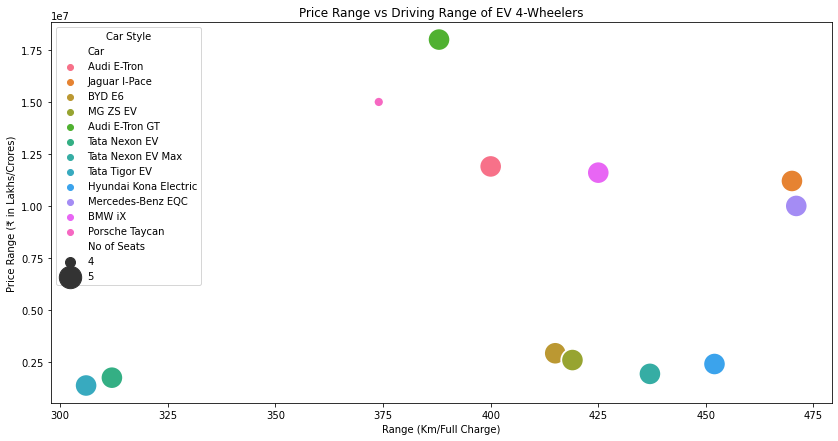

In [106]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Range in Km/Full Charge', y='Price_Max', hue='Car', size='No of Seats', sizes=(100, 500))
plt.title('Price Range vs Driving Range of EV 4-Wheelers')
plt.xlabel('Range (Km/Full Charge)')
plt.ylabel('Price Range (₹ in Lakhs/Crores)')
plt.legend(title='Car Style', loc='upper left')
plt.show()

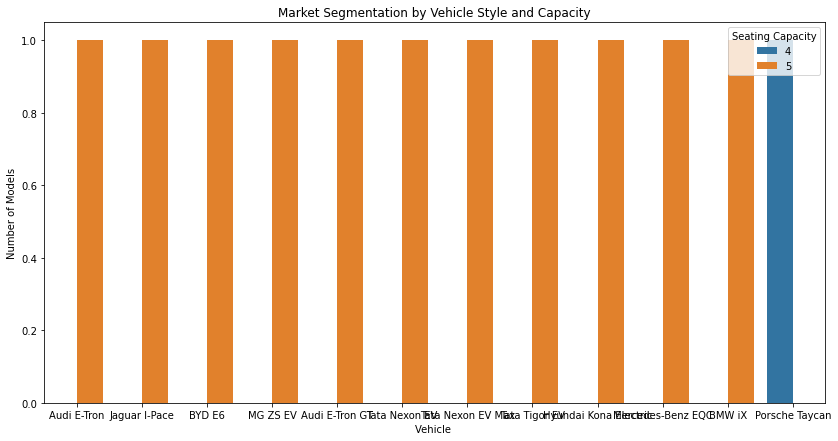

In [107]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Car', hue='No of Seats')
plt.title('Market Segmentation by Vehicle Style and Capacity')
plt.xlabel('Vehicle ')
plt.ylabel('Number of Models')
plt.legend(title='Seating Capacity')
plt.show()

# PCA Algorithm

In [71]:
numcols=data.select_dtypes(include=['float','int'])

In [72]:
numcols

,Range in Km/Full Charge,No of Seats,BootSpace in Litre,Price_Max
9,400,5,660.000000,11900000.0
7,470,5,656.000000,11200000.0
5,415,5,580.000000,2915000.0
4,419,5,448.000000,2588000.0
11,388,5,405.000000,18000000.0
1,312,5,350.000000,1740000.0
2,437,5,350.000000,1924000.0
0,306,5,316.000000,1364000.0
3,452,5,430.933833,2398000.0
6,471,5,505.327706,10000000.0


In [73]:
catcols=data.select_dtypes(include=['object', 'category'])

In [ ]:
std=StandardScaler()
scaledcolumns=std.fit_transform(numcols)

In [80]:
pca=PCA(n_components=2)

In [81]:
pca_df=pca.fit_transform(scaledcolumns)

In [82]:
pca_df

array([[-1.30337591, -0.22336325],
       [-1.76288164, -1.11014396],
       [-0.06193941, -0.6904502 ],
       [ 0.68013853, -0.54814994],
       [-0.39661985,  0.59963034],
       [ 2.16109757,  0.88310869],
       [ 1.15506559, -0.64654371],
       [ 2.43735837,  0.99302687],
       [ 0.53447939, -0.93612191],
       [-0.80382933, -0.94134413],
       [-0.69056334, -0.32725651],
       [-1.94892999,  2.94760772]])

In [86]:
pca.explained_variance_

array([2.05295667, 1.37827276])

In [89]:
le = LabelEncoder()
car_labels = le.fit_transform(data['Car'])

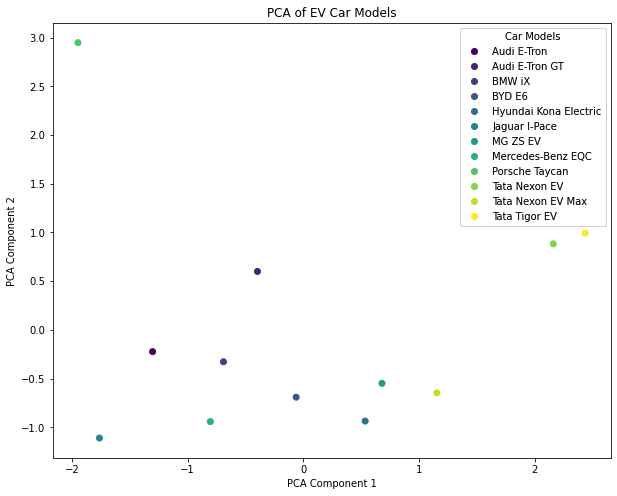

In [92]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df[:, 0], pca_df[:, 1], c=car_labels, cmap='viridis')

legend1 = plt.legend(*scatter.legend_elements(), title="Car Models")
plt.gca().add_artist(legend1)

legend1.get_texts()
for i, text in enumerate(legend1.get_texts()):
    text.set_text(le.classes_[i])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of EV Car Models')
plt.show()

# Heirarchical Clustering Algorithm

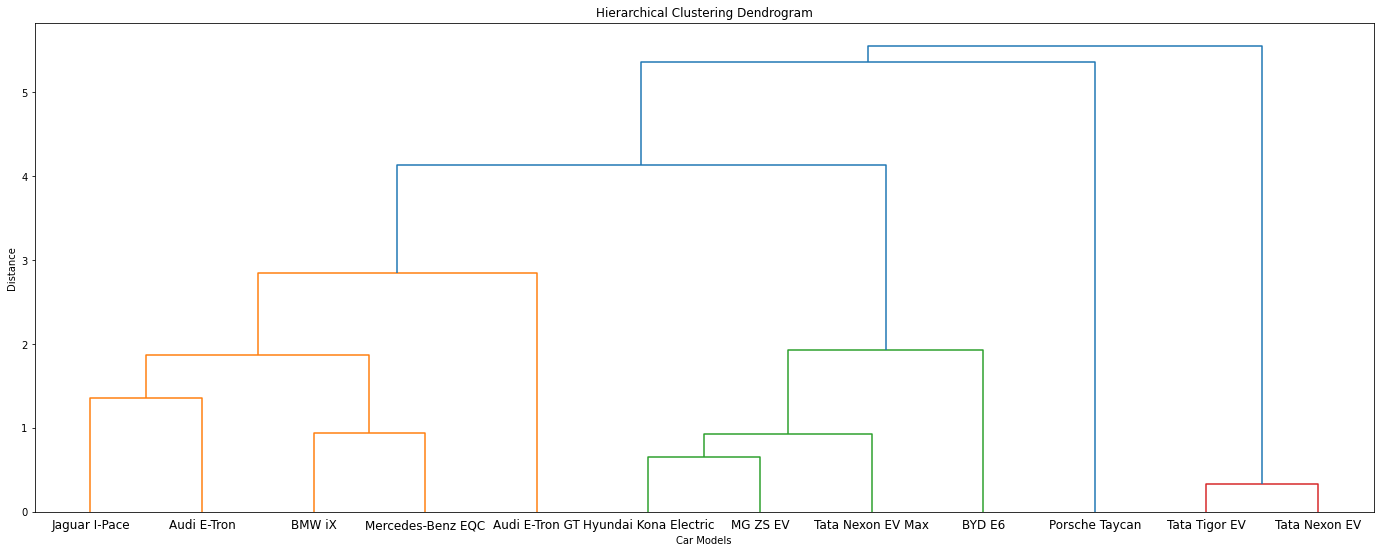

In [100]:
linked = linkage(scaledcolumns, method='ward')

plt.figure(figsize=(24, 9))
dendrogram(linked,
           orientation='top',
           labels=data['Car'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car Models')
plt.ylabel('Distance')
plt.show()

#### 1.Jaguar I-Pace and Audi E-Tron form a tight cluster, indicating they are very similar in terms of the features used.
#### 2.BMW iX and Mercedes-Benz EQC also form a cluster that is similar but slightly more distant compared to the Jaguar and Audi cluster.
#### 3.The Hyundai Kona Electric and MG ZS EV are grouped closely, indicating similarities.
#### 4. Tata Tigor EV and Tata Nexon EV form a close cluster, as they likely share many common features.

#### 5.The cluster of Tata Nexon EV Max and BYD E6 indicates they are somewhat similar but more distinct from other vehicles.
#### 6. A higher-level cluster is formed by merging several smaller clusters, showing that models like Porsche Taycan and BYD E6 are less similar to the others and only group together at a higher distance threshold

# Cluster Analysis Alogorithm

In [102]:
cluster_labels = fcluster(linked, t=4, criterion='maxclust')  
data['Cluster'] = cluster_labels

In [103]:
cluster_analysis = data.groupby('Cluster').mean()  
print(cluster_analysis)

         Range in Km/Full Charge  No of Seats  BootSpace in Litre   Price_Max
Cluster                                                                      
1                         309.00          5.0          333.000000   1552000.0
2                         430.75          5.0          452.233458   2456250.0
3                         430.80          5.0          549.462632  12540000.0
4                         374.00          4.0          554.258168  15000000.0


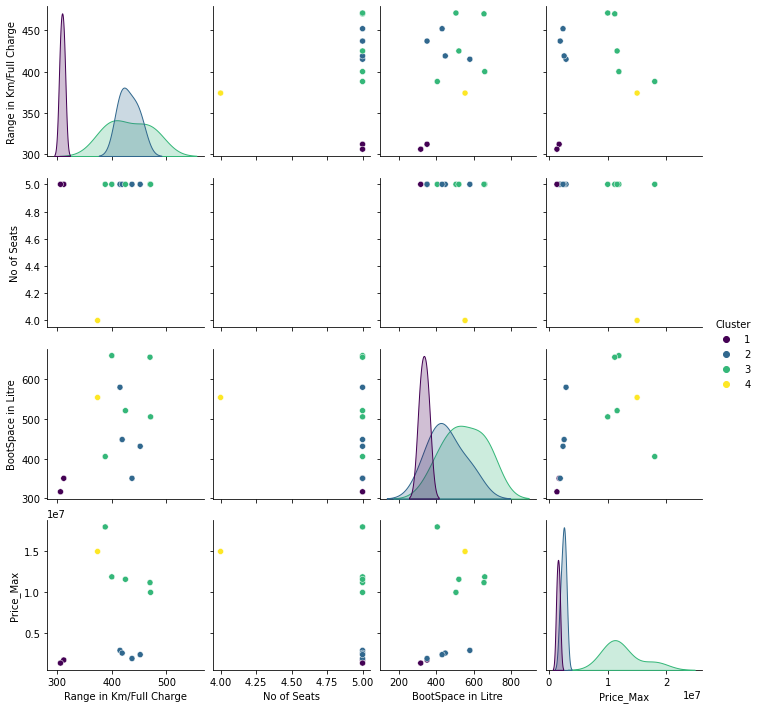

In [104]:
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

## Result: We see cluster 2, cluster 3 and cluster 4 points mostly together, except for their difference in no. of seats however cluster 1, which is Budget friendly and short ranged shows unfamiliarity with other EVs. Thus, high-end, long ranged EVs and compact ones with unique features show considerable familiarity. 